In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('traingc.csv')
data.head()

,y,x1,x2,x3,x4
0,0,3861.22,3861.66,3860.75,3861.38
1,0,3861.19,3861.38,3860.16,3861.25
2,0,3861.38,3861.38,3858.47,3858.53
3,1,3858.72,3858.72,3857.03,3858.19
4,1,3858.09,3859.16,3858.03,3858.81


In [2]:
ytrain = data['y']
ytrain.shape

(10000,)

In [3]:
xtrain = data.drop(columns = ['y'])
xtrain.shape

(10000, 4)

In [5]:
xtrain.describe()

,x1,x2,x3,x4
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3859.746285,3860.436589,3859.019152,3859.743452
std,69.890906,69.870393,69.926005,69.890324
min,3709.130000,3710.810000,3708.310000,3709.160000
25%,3792.082500,3792.690000,3791.410000,3792.030000
50%,3860.015000,3860.675000,3859.190000,3859.955000
75%,3926.750000,3927.350000,3926.130000,3926.757500
max,3971.590000,3972.250000,3970.660000,3971.690000


In [6]:
data.groupby('y').count()

,x1,x2,x3,x4
y,,,,
0,4961,4961,4961,4961
1,5039,5039,5039,5039


In [7]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


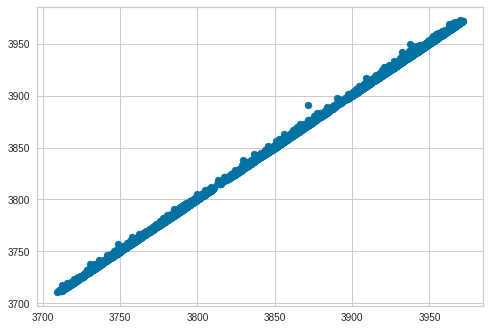

In [ ]:
plt.scatter(xtrain['x1'],xtrain['x2'])
plt.show()

In [ ]:
data.groupby('y').median()

,x1,x2,x3,x4
y,,,,
0,3861.09,3861.66,3860.19,3860.69
1,3858.63,3859.44,3858.13,3858.81


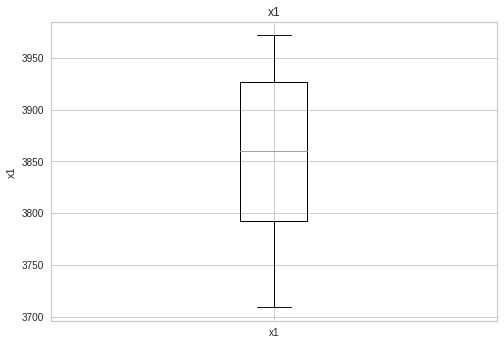

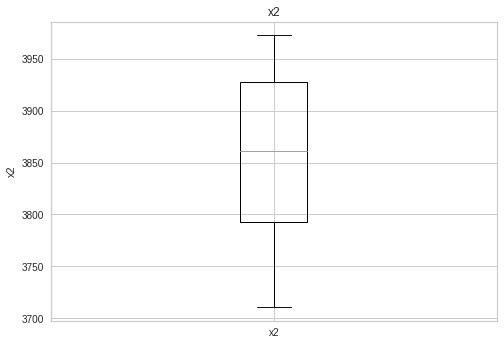

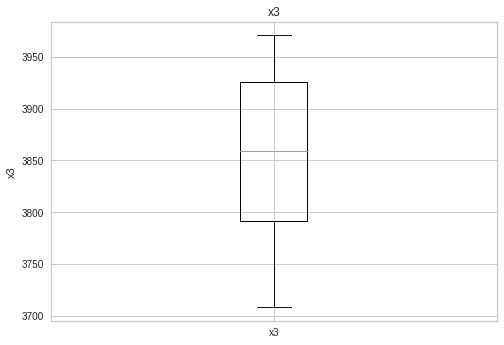

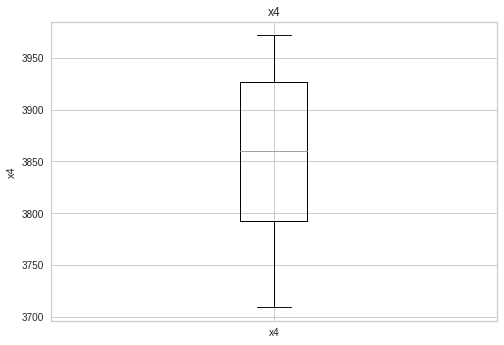

In [ ]:
for feature in xtrain.columns:
  xtrain.boxplot(column=feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [15]:
dataset = data.copy()
dataset['x2-x1'] = dataset['x2']-dataset['x1']
dataset['x3-x1'] = dataset['x3']-dataset['x1']
dataset['x3-x2'] = dataset['x3']-dataset['x2']
dataset['x3-x4'] = dataset['x3']-dataset['x4']
dataset['x2-x4'] = dataset['x2']-dataset['x4']
dataset['x4-x1'] = dataset['x4']-dataset['x1']

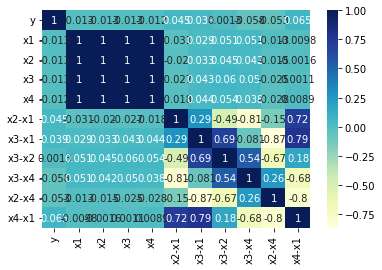

In [20]:
import seaborn as sns
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [16]:
x1train = dataset.drop(columns = ['y','x1','x2','x3','x4'])
y1train = dataset['y']
x1train.shape

(10000, 6)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1train, y1train, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(8000, 6)
(2000, 6)


In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
clf = RidgeClassifier()
scores = cross_val_score(clf, x1train, y1train)
scores.mean()

0.5445

In [61]:
from sklearn.metrics import classification_report
model = RidgeClassifier().fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1017
           1       0.54      0.60      0.57       983

    accuracy                           0.55      2000
   macro avg       0.56      0.56      0.55      2000
weighted avg       0.56      0.55      0.55      2000



In [43]:
#full train before saving
model = RidgeClassifier().fit(x1train, y1train)

In [44]:
import pickle
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)    

In [59]:
del model

In [60]:
# Load from file
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

# Testing Prediction

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tesdata = pd.read_csv('testgc.csv')
tesdata.shape

(1000, 4)

In [53]:
tesdata['x2-x1'] = tesdata['x2']-tesdata['x1']
tesdata['x3-x1'] = tesdata['x3']-tesdata['x1']
tesdata['x3-x2'] = tesdata['x3']-tesdata['x2']
tesdata['x3-x4'] = tesdata['x3']-tesdata['x4']
tesdata['x2-x4'] = tesdata['x2']-tesdata['x4']
tesdata['x4-x1'] = tesdata['x4']-tesdata['x1']
tesdata.head()

,x1,x2,x3,x4,x2-x1,x3-x1,x3-x2,x3-x4,x2-x4,x4-x1
0,3798.66,3798.84,3798.09,3798.16,0.18,-0.57,-0.75,-0.07,0.68,-0.50
1,3798.22,3798.78,3798.13,3798.53,0.56,-0.09,-0.65,-0.40,0.25,0.31
2,3798.50,3799.06,3798.28,3798.28,0.56,-0.22,-0.78,0.00,0.78,-0.22
3,3798.31,3798.41,3797.53,3798.06,0.10,-0.78,-0.88,-0.53,0.35,-0.25
4,3797.94,3798.78,3797.84,3798.75,0.84,-0.10,-0.94,-0.91,0.03,0.81


In [54]:
xtest =tesdata.drop(columns = ['x1','x2','x3','x4'])
xtest.head()

,x2-x1,x3-x1,x3-x2,x3-x4,x2-x4,x4-x1
0,0.18,-0.57,-0.75,-0.07,0.68,-0.50
1,0.56,-0.09,-0.65,-0.40,0.25,0.31
2,0.56,-0.22,-0.78,0.00,0.78,-0.22
3,0.10,-0.78,-0.88,-0.53,0.35,-0.25
4,0.84,-0.10,-0.94,-0.91,0.03,0.81


In [55]:
xtest.shape

(1000, 6)

In [56]:
predictions = model.predict(xtest)

In [57]:
predictions.shape

(1000,)

In [66]:
df = pd.DataFrame({'y':predictions})
df.head()

,y
0,0
1,1
2,0
3,1
4,1


In [67]:
df.shape

(1000, 1)

In [68]:
df.to_csv('submission.csv',index=False)